In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pickle 

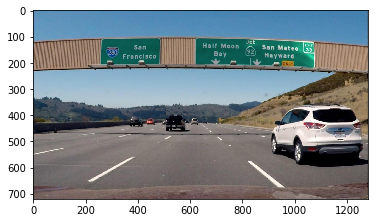

In [2]:
image = mpimg.imread('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/signs_vehicles_xygrad.png')
plt.imshow(image)

In [9]:
def abs_sobel_threshold(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if (orient == 'x'):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif (orient == 'y'):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    else:
        return print('Orient value only accepts x or y')
    abs_sobel = np.absolute(sobel)
    sbinary = np.zeros_like(abs_sobel)
    sbinary[(abs_sobel > thresh[0]) & (abs_sobel < thresh[1])] = 1
    return sbinary

In [14]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    mag_sobel = np.sqrt(abs_sobelx**2 + abs_sobely**2)
    mag_binary = np.zeros_like(mag_sobel)
    mag_binary[(mag_sobel > mag_thresh[0]) & (mag_sobel < mag_thresh[1])] = 1
    return mag_binary

In [20]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sx = np.absolute(sobelx)
    abs_sy = np.absolute(sobely)
    degrees = np.arctan2(abs_sx, abs_sy)
    dir_binary = np.zeros_like(degrees)
    dir_binary[(thresh[0] < degrees) & (degrees < thresh[1])] = 1
    return dir_binary

In [95]:
ksize = 9
gradx = abs_sobel_threshold(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_threshold(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 50))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(np.pi/45, np.pi/135))

In [96]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

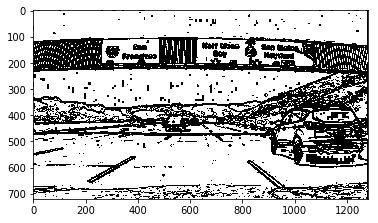

In [97]:
plt.imshow(combined, cmap='gray')